In [1]:
from google.colab import files

# This will open a file upload dialog in Colab
uploaded = files.upload()


Saving US_Accidents_Dec20_Updated.csv to US_Accidents_Dec20_Updated.csv


In [4]:
import pandas as pd

# Replace the filename with your uploaded file's name
df = pd.read_csv('US_Accidents_Dec20_Updated.csv')

# Check shape and preview data
print(df.shape)
df.head()

(42768, 47)


/tmp/ipython-input-4-1590849953.py:4: DtypeWarning: Columns (30,31,32,33,34,35,36,37,38,39,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('US_Accidents_Dec20_Updated.csv')


,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,2,2019-05-21 08:29:55,2019-05-21 09:29:40,34.808868,-82.269157,34.808868,-82.269157,0.0,Accident on Tanner Rd at Pennbrooke Ln.,...,False,False,False,False,False,False,Day,Day,Day,Day
1,A-2,2,2019-10-07 17:43:09,2019-10-07 19:42:50,35.090080,-80.745560,35.090080,-80.745560,0.0,Accident on Houston Branch Rd at Providence Br...,...,False,False,False,False,False,False,Day,Day,Day,Day
2,A-3,2,2020-12-13 21:53:00,2020-12-13 22:44:00,37.145730,-121.985052,37.165850,-121.988062,1.4,Stationary traffic on CA-17 from Summit Rd (CA...,...,False,False,False,False,False,False,Night,Night,Night,Night
3,A-4,2,2018-04-17 16:51:23,2018-04-17 17:50:46,39.110390,-119.773781,39.110390,-119.773781,0.0,Accident on US-395 Southbound at Topsy Ln.,...,False,False,False,False,True,False,Day,Day,Day,Day
4,A-5,3,2016-08-31 17:40:49,2016-08-31 18:10:49,26.102942,-80.265091,26.102942,-80.265091,0.0,Accident on I-595 Westbound at Exit 4 / Pine I...,...,False,False,False,False,True,False,Day,Day,Day,Day


In [6]:
# Convert time column to datetime
df['Start_Time'] = pd.to_datetime(df['Start_Time'], format='mixed')

# Extract useful time parts
df['Hour'] = df['Start_Time'].dt.hour
df['DayOfWeek'] = df['Start_Time'].dt.day_name()
df['Month'] = df['Start_Time'].dt.month_name()

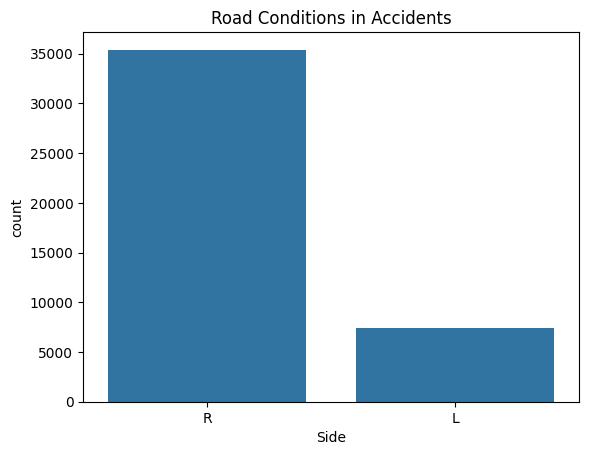

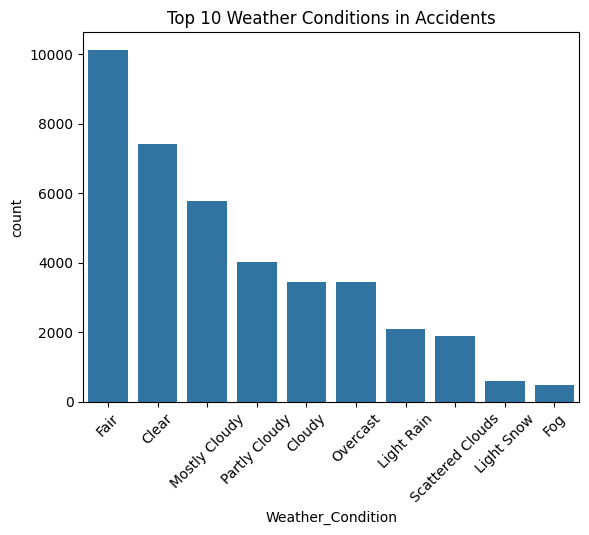

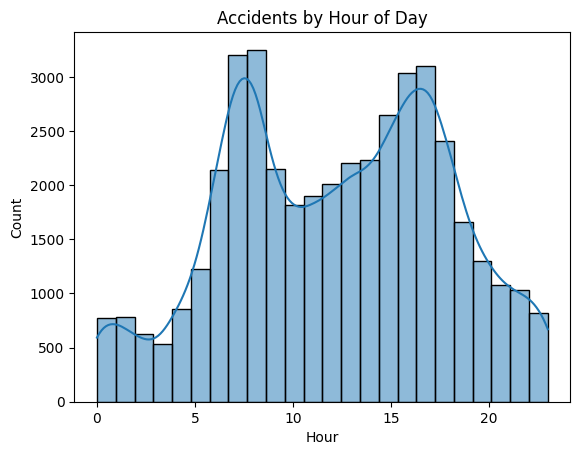

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Weather
sns.countplot(data=df, x='Weather_Condition', order=df['Weather_Condition'].value_counts().head(10).index)
plt.xticks(rotation=45)
plt.title("Top 10 Weather Conditions in Accidents")
plt.show()

# Time of day
sns.histplot(df['Hour'], bins=24, kde=True)
plt.title("Accidents by Hour of Day")
plt.xlabel("Hour")
plt.show()


In [8]:
import folium
from folium.plugins import HeatMap

# Sample 1000 for performance
sample_df = df[['Start_Lat', 'Start_Lng']].dropna().sample(1000)

# Map
m = folium.Map(location=[39.5, -98.35], zoom_start=4)  # USA center
HeatMap(data=sample_df.values, radius=8).add_to(m)
m


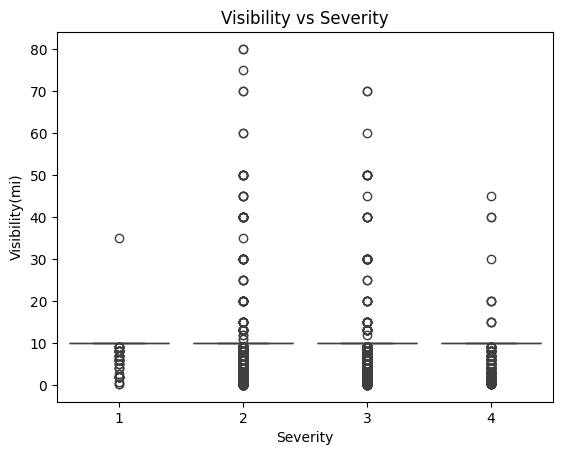

In [13]:
# Severity by weather
sns.boxplot(data=df, x='Severity', y='Visibility(mi)')
plt.title("Visibility vs Severity")
plt.show()


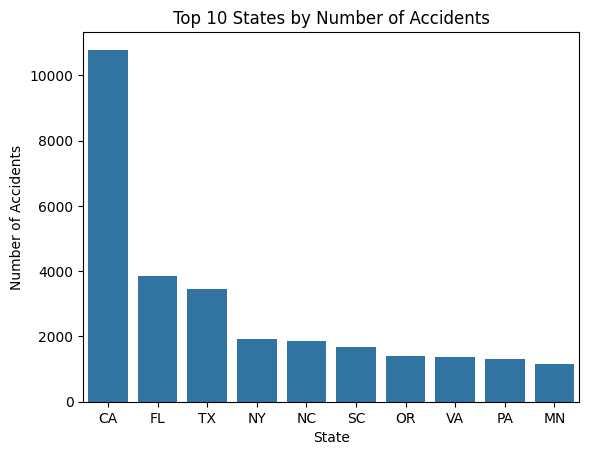

In [12]:
top_states = df['State'].value_counts().head(10)
sns.barplot(x=top_states.index, y=top_states.values)
plt.title("Top 10 States by Number of Accidents")
plt.ylabel("Number of Accidents")
plt.xlabel("State")
plt.show()
